# Solutions for Missing Content in RAG

Here we will explore the following strategies

- Better Data Cleaning
- Better Prompting
- Agentic RAG with Tools


## Exploring Useful Data Loaders

#### Install OpenAI, HuggingFace and LangChain dependencies

In [ ]:
!pip install langchain
!pip install langchain-openai
!pip install langchain-community

In [ ]:
# takes 2 - 5 mins to install on Colab
!pip install "unstructured[all-docs]"

In [ ]:
# install OCR dependencies for unstructured
!sudo apt-get install tesseract-ocr
!sudo apt-get install poppler-utils

#### PDF Loaders

[Portable Document Format (PDF)](https://en.wikipedia.org/wiki/PDF), standardized as ISO 32000, is a file format developed by Adobe in 1992 to present documents, including text formatting and images, in a manner independent of application software, hardware, and operating systems.

LangChain integrates with a host of PDF parsers. Some are simple and relatively low-level; others will support OCR and image-processing, or perform advanced document layout analysis. The right choice will depend on your use-case and through experimentation.

Here we will see how to load PDF documents into the LangChain `Document` format

We download a research paper to experiment with

If the following command fails you can download the paper manually by going to http://arxiv.org/pdf/2103.15348.pdf, save it as `layoutparser_paper.pdf`and upload it on the left in Colab from the upload files option

In [1]:
!wget -O 'layoutparser_paper.pdf' 'http://arxiv.org/pdf/2103.15348.pdf'

--2024-08-28 22:53:44--  http://arxiv.org/pdf/2103.15348.pdf
Resolving arxiv.org (arxiv.org)... 151.101.131.42, 151.101.3.42, 151.101.67.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.131.42|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://arxiv.org/pdf/2103.15348 [following]
--2024-08-28 22:53:44--  http://arxiv.org/pdf/2103.15348
Reusing existing connection to arxiv.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 4686220 (4.5M) [application/pdf]
Saving to: ‘layoutparser_paper.pdf’

layoutparser_paper. 100%[===================>]   4.47M   466KB/s    in 10s     

2024-08-28 22:53:55 (454 KB/s) - ‘layoutparser_paper.pdf’ saved [4686220/4686220]



#### UnstructuredPDFLoader

[Unstructured.io](https://unstructured-io.github.io/unstructured/) supports a common interface for working with unstructured or semi-structured file formats, such as Markdown or PDF. LangChain's [`UnstructuredPDFLoader`](https://api.python.langchain.com/en/latest/document_loaders/langchain_community.document_loaders.pdf.UnstructuredPDFLoader.html) integrates with Unstructured to parse PDF documents into LangChain [`Document`](https://api.python.langchain.com/en/latest/documents/langchain_core.documents.base.Document.html) objects.

In [1]:
from langchain_community.document_loaders import UnstructuredPDFLoader

Load PDF with complex parsing, table detection and chunking by sections

In [2]:
# takes 3-4 mins on Colab
loader = UnstructuredPDFLoader('./layoutparser_paper.pdf',
                               strategy='hi_res',
                               extract_images_in_pdf=True,
                               infer_table_structure=True,
                               chunking_strategy="by_title", # section-based chunking
                               max_characters=4000, # max size of chunks
                               new_after_n_chars=3800, # preferred size of chunks
                               combine_text_under_n_chars=2000, # smaller chunks < 2000 chars will be combined into a larger chunk
                               mode='elements')
data = loader.load()

2024-08-28 23:06:46.646102: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-28 23:06:46.662526: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-28 23:06:46.667221: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-28 23:06:46.679509: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-28 23:06:47.525250: W tensorflow/compiler/tf2

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/115M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
len(data)

18

In [4]:
[doc.metadata['category'] for doc in data]

['CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'Table',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement',
 'CompositeElement']

In [5]:
data[0]

Document(metadata={'source': './layoutparser_paper.pdf', 'filetype': 'application/pdf', 'languages': ['eng'], 'last_modified': '2023-01-23T14:15:33', 'page_number': 1, 'file_directory': '.', 'filename': 'layoutparser_paper.pdf', 'category': 'CompositeElement'}, page_content='1 2 0 2 n u J 1 2 ] V C . s c [\n\n2 v 8 4 3 5 1 . 3 0 1 2 : v i X r a\n\nLayoutParser: A Uniﬁed Toolkit for Deep Learning Based Document Image Analysis\n\nZejiang Shen! (4), Ruochen Zhang”, Melissa Dell?, Benjamin Charles Germain Lee*, Jacob Carlson’, and Weining Li®\n\n1 Allen Institute for AI shannons@allenai.org 2 Brown University ruochen zhang@brown.edu 3 Harvard University {melissadell,jacob carlson}@fas.harvard.edu 4 University of Washington bcgl@cs.washington.edu 5 University of Waterloo w422li@uwaterloo.ca\n\nAbstract. Recent advances in document image analysis (DIA) have been primarily driven by the application of neural networks. Ideally, research outcomes could be easily deployed in production and exten

In [6]:
print(data[0].page_content)

1 2 0 2 n u J 1 2 ] V C . s c [

2 v 8 4 3 5 1 . 3 0 1 2 : v i X r a

LayoutParser: A Uniﬁed Toolkit for Deep Learning Based Document Image Analysis

Zejiang Shen! (4), Ruochen Zhang”, Melissa Dell?, Benjamin Charles Germain Lee*, Jacob Carlson’, and Weining Li®

1 Allen Institute for AI shannons@allenai.org 2 Brown University ruochen zhang@brown.edu 3 Harvard University {melissadell,jacob carlson}@fas.harvard.edu 4 University of Washington bcgl@cs.washington.edu 5 University of Waterloo w422li@uwaterloo.ca

Abstract. Recent advances in document image analysis (DIA) have been primarily driven by the application of neural networks. Ideally, research outcomes could be easily deployed in production and extended for further investigation. However, various factors like loosely organized codebases and sophisticated model conﬁgurations complicate the easy reuse of im- portant innovations by a wide audience. Though there have been on-going eﬀorts to improve reusability and simplify deep learni

In [7]:
data[5]

Document(metadata={'source': './layoutparser_paper.pdf', 'detection_class_prob': 0.9028143882751465, 'coordinates': {'points': ((379.4666442871094, 383.0013732910156), (379.4666442871094, 570.6319580078125), (1321.4498291015625, 570.6319580078125), (1321.4498291015625, 383.0013732910156)), 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'last_modified': '2023-01-23T14:15:33', 'text_as_html': "<table><thead><th>Dataset</th><th>| Base Model'|</th><th>| Notes</th></thead><tr><td>PubLayNet B8]|</td><td>F/M</td><td>Layouts of modern scientific documents</td></tr><tr><td>PRImA</td><td>M</td><td>Layouts of scanned modern magazines and scientific report</td></tr><tr><td>Newspaper</td><td>F</td><td>Layouts of scanned US newspapers from the 20th century</td></tr><tr><td>TableBank</td><td>F</td><td>Table region on modern scientific and business document</td></tr><tr><td>HJDataset</td><td>F/M</td><td>Layouts of history Japanese documents</td></tr></table>", 'filetype': 'appli

In [8]:
data[5].page_content

'Dataset Base Model1 Large Model Notes PubLayNet [38] PRImA [3] Newspaper [17] TableBank [18] HJDataset [31] F / M M F F F / M M - - F - Layouts of modern scientiﬁc documents Layouts of scanned modern magazines and scientiﬁc reports Layouts of scanned US newspapers from the 20th century Table region on modern scientiﬁc and business document Layouts of history Japanese documents'

In [9]:
from IPython.display import HTML

HTML(data[5].metadata['text_as_html'])

PubLayNet B8]|,F/M,Layouts of modern scientific documents
PRImA,M,Layouts of scanned modern magazines and scientific report
Newspaper,F,Layouts of scanned US newspapers from the 20th century
TableBank,F,Table region on modern scientific and business document
HJDataset,F/M,Layouts of history Japanese documents


In [10]:
! ls -l ./figures

total 336
-rw-rw-r-- 1 jawad jawad 89611 Aug 28 23:09 figure-10-4.jpg
-rw-rw-r-- 1 jawad jawad 42187 Aug 28 23:09 figure-11-5.jpg
-rw-rw-r-- 1 jawad jawad 62655 Aug 28 23:09 figure-13-6.jpg
-rw-rw-r-- 1 jawad jawad 36497 Aug 28 23:09 figure-4-1.jpg
-rw-rw-r-- 1 jawad jawad 31580 Aug 28 23:09 figure-6-2.jpg
-rw-rw-r-- 1 jawad jawad 72034 Aug 28 23:09 figure-9-3.jpg


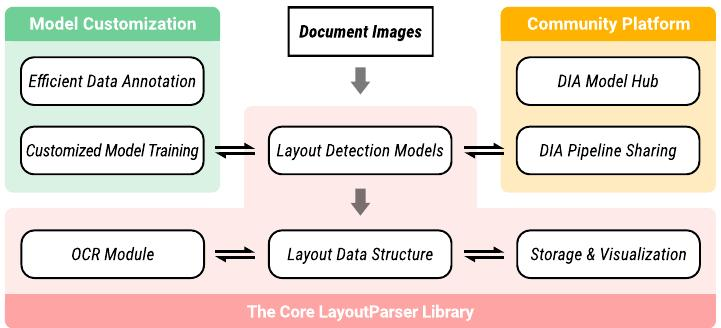

In [11]:
from IPython.display import Image

Image('./figures/figure-4-1.jpg')

## Better Prompting for Consistent Results

#### Load Connection to LLM

Here we create a connection to ChatGPT to use later in our chains

In [14]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="llama3:8b-instruct-fp16", temperature=0, base_url="http://172.31.0.1:11434/v1", api_key="Empty")

#### Problematic RAG Prompt

In [13]:
from langchain_core.prompts import ChatPromptTemplate

prompt = """You are an assistant for question-answering tasks.
            Give an answer to the following question with the context provided

            Question:
            {question}

            Context:
            {context}

            Answer:
         """

prompt_template = ChatPromptTemplate.from_template(prompt)

In [15]:
context = """
The cricket world cup champion of 2023 is Australia

The cricket Twenty20 International champion of 2024 is India
"""

question = "Who is the euro 2020 champion?"

qa_rag_chain = (
    prompt_template
      |
    llm
)

In [16]:
response = qa_rag_chain.invoke({'context': context, 'question': question})
print(response.content)

Based on the provided context, there is no mention of Euro 2020 or its champion. The context only mentions cricket world cup and T20 champions for different years. Therefore, I cannot provide an answer to the question "Who is the euro 2020 champion?" as it is not relevant to the given context.

However, if you're looking for information on the actual Euro 2020 champion, Italy won the tournament by defeating England in the final with a penalty shootout after the match ended 1-1 after extra time.


#### Better RAG Prompt

In [17]:
from langchain_core.prompts import ChatPromptTemplate

prompt = """You are an assistant for question-answering tasks.
            Use the following pieces of retrieved context to answer the question.
            If no context is present or if you don't know the answer, just say that you don't know.
            Do not make up the answer unless it is there in the provided context.

            Question:
            {question}

            Context:
            {context}

            Answer:
         """

prompt_template = ChatPromptTemplate.from_template(prompt)

In [18]:
qa_rag_chain = (
    prompt_template
      |
    llm
)

In [19]:
response = qa_rag_chain.invoke({'context': context, 'question': question})
print(response.content)

I don't know. The provided context does not mention anything about the Euro 2020 champion. It only talks about cricket championships in 2023 and 2024.


## Agentic RAG with Tools

What is an Agent?

LLM + Prompts + Tools

Prompts instruct the LLM to understand which tools to call to solve specific problems.

However tool calls need to be done separately

#### Enter Tavily Search Tool API Key

Get a free API key from [here](https://tavily.com/#api)

In [22]:
from getpass import getpass
import os

In [21]:
TAVILY_API_KEY = getpass('Enter Tavily Search API Key: ')

In [23]:
os.environ['TAVILY_API_KEY'] = TAVILY_API_KEY

#### Setup Search Tool

In [24]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.tools import tool
import rich

@tool
def search_web(query: str) -> list:
    """Search the web for a query."""
    tavily_tool = TavilySearchResults(max_results=3,
                                      search_depth='advanced',
                                      max_tokens=10000)
    results = tavily_tool.invoke(query)
    return [doc['content'] for doc in results]

In [25]:
question

'Who is the euro 2020 champion?'

In [26]:
search_web(question)

/home/jawad/anaconda3/envs/gpu/lib/python3.12/site-packages/langchain_core/_api/deprecation.py:141: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use invoke instead.
  warn_deprecated(


["Italy are the champions of Europe. On Saturday in the Euro 2020 final, the Italians defeated England in a penalty shootout to become the undisputed kings of the continent. The win is Italy's ...",
 "The UEFA Euro 2020 final was an association football match that took place at Wembley Stadium in London, England, on 11 July 2021, to determine the winners of UEFA Euro 2020.It was the sixteenth final of the UEFA European Championship, a quadrennial tournament contested by the senior men's national teams of the member associations of UEFA to decide the champions of Europe.",
 "The 2020 UEFA European Football Championship, commonly referred to as UEFA Euro 2020 or simply Euro 2020, was the 16th UEFA European Championship, the quadrennial international men's football championship of Europe organised by the Union of European Football Associations (UEFA). [1] To celebrate the 60th anniversary of the European Championship competition, UEFA president Michel Platini ..."]

#### Bind Tools to LLM

In [28]:
tools = [search_web]
llm_with_tools = llm.bind_tools(tools)

#### Better RAG Prompt with Tool Calling

In [29]:
prompt = """You are an assistant for question-answering tasks.
            Use the following pieces of retrieved context to answer the question.
            If no context is present or if you don't know the answer,
            check and see if you can use the tools available to you to get the answer.


            Question:
            {question}

            Context:
            {context}

            Answer:
         """

prompt_template = ChatPromptTemplate.from_template(prompt)

qa_rag_chain = (
    prompt_template
      |
    llm_with_tools
)

In [ ]:
context = """
The cricket world cup champion of 2023 is Australia

The cricket Twenty20 International champion of 2024 is India
"""

question = "Who is the euro 2020 champion?"

qa_rag_chain.invoke({'context': context, 'question': question})

In [ ]:
question = "Who is the T20 2024 champion?"

qa_rag_chain.invoke({'context': context, 'question': question})

AIMessage(content='The T20 2024 champion is India.', response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 147, 'total_tokens': 158}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_ba606877f9', 'finish_reason': 'stop', 'logprobs': None}, id='run-fbf2b8da-b724-40ea-9af1-16484b0ae0b1-0', usage_metadata={'input_tokens': 147, 'output_tokens': 11, 'total_tokens': 158})

#### Simple Agentic RAG with Tool Calls

In [ ]:
def agentic_rag(question, context):
  tool_call_map = {'search_web' : search_web}
  response = qa_rag_chain.invoke({'context': context, 'question': question})

  # if response content is present then we have our answer
  if response.content:
    print('Answer is in retrieved context')
    answer = response.content

  # if no response content present then call search tool
  elif response.tool_calls:
    print('Answer not in context, trying to use tools')
    tool_call = response.tool_calls[0]
    selected_tool = tool_call_map[tool_call["name"].lower()]
    print(f"Calling tool: {tool_call['name']}")
    tool_output = selected_tool.invoke(tool_call["args"])
    context = '\n\n'.join(tool_output)
    response = qa_rag_chain.invoke({'context': context, 'question': question})
    answer = response.content

  # no answer found from web search also
  else:
    answer = 'No answer found'

  print(answer)

In [ ]:
context = """
The cricket world cup champion of 2023 is Australia

The cricket Twenty20 International champion of 2024 is India
"""

question = "Who is the T20 2024 champion?"

agentic_rag(question, context)

Answer is in retrieved context
The T20 2024 champion is India.


In [ ]:
question = "Who is the euro 2024 champion?"

agentic_rag(question, context)

Answer not in context, trying to use tools
Calling tool: search_web
Spain is the Euro 2024 champion, having won their fourth European Championship by defeating England 2-1 in the final held in Berlin.
